In [2]:
import os
import glob
import pathlib

In [3]:
filelist=glob.glob('frames_drunk/*')

In [4]:
len(filelist)

155702

In [5]:
soberfilelist=glob.glob('frames_sober/*')

In [6]:
len(soberfilelist)

1041490

In [7]:
#70% training, 15% val 15% test

In [8]:
soberfilelist[0]

'frames_sober/frame_1015405.jpg'

In [9]:
import cv2

X=[]
y=[]
for i in range(len(filelist)):
    image=cv2.imread(filelist[i])
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(128,128))
    X.append(image)
    y.append(int(1))
for j in range(0,778510,5):
    image=cv2.imread(soberfilelist[j])
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(128,128))
    X.append(image)
    y.append(int(0))   

In [17]:
len(X)

311404

In [18]:
len(filelist)*2

311404

In [10]:
import matplotlib.pyplot as plt
image=X[164000]
plt.imshow(image)

plt.title(y[164000])
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,shuffle=True)

In [13]:
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.15,shuffle=True)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation

/Users/aryapalla/opt/anaconda3/envs/videopipeline/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [19]:
model=Sequential()
model.add(Dense(2048,input_shape=(49152,),activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))


In [20]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2048)              100665344 
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
__________

In [15]:
import numpy as np
X_test=np.array(X_test)
X_train=np.array(X_val)
X_val=np.array(X_val)

In [16]:
y_test=np.array(y_test)
y_train=np.array(y_val)
y_val=np.array(y_val)

In [23]:
history=model.fit(X_train.reshape(-1,49152),y_train,validation_data=(X_val.reshape(-1,49152),y_val),epochs=20,batch_size=48,shuffle=True)

Train on 79408 samples, validate on 79408 samples
Epoch 1/20
79408/79408 [==============================] - 1676s 21ms/step - loss: 0.7072 - acc: 0.5003 - val_loss: 0.6938 - val_acc: 0.5000
Epoch 2/20
79408/79408 [==============================] - 1762s 22ms/step - loss: 0.6955 - acc: 0.5031 - val_loss: 0.6938 - val_acc: 0.5000
Epoch 3/20
79408/79408 [==============================] - 1724s 22ms/step - loss: 0.6938 - acc: 0.5037 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/20
79408/79408 [==============================] - 1705s 21ms/step - loss: 0.6939 - acc: 0.4997 - val_loss: 0.6954 - val_acc: 0.5000
Epoch 5/20
79408/79408 [==============================] - 1706s 21ms/step - loss: 0.6939 - acc: 0.4985 - val_loss: 0.6935 - val_acc: 0.5000
Epoch 6/20
79408/79408 [==============================] - 1677s 21ms/step - loss: 0.6995 - acc: 0.4994 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 7/20
79408/79408 [==============================] - 1668s 21ms/step - loss: 0.7004 - acc: 0.5023 - val_l

In [17]:
import tensorflow as tf

In [18]:
cnnmodel=tf.keras.models.Sequential([ 
                                  # Convolution 1 / Input Layer
                                  tf.keras.layers.Conv2D(128,(5,5),input_shape=(128,128,3,),activation='relu',padding="same",strides=(2,2)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Dropout(0.15),
                                  # Convolution 2
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Dropout(0.1),
                                  # Convolution 3
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Dropout(0.1),
                                  # Convolution 4
                                  tf.keras.layers.Conv2D(16,(2,2),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Dropout(0.1),
                                  # Flattening Layer
                                  tf.keras.layers.Flatten(),
                                  # Dense 1
                                  tf.keras.layers.Dense(2048,activation='relu'),
                                  tf.keras.layers.Dropout(0.5),
                                  # Dense 2
                                  tf.keras.layers.Dense(1024,activation='relu'),
                                  # Dense 3
                                  tf.keras.layers.Dense(516,activation='relu'),
                                  # Dense 4
                                  tf.keras.layers.Dense(256,activation='relu'),
                                  # Dense 5
                                  tf.keras.layers.Dense(64,activation='relu'),
                                  # Dense 6
                                  tf.keras.layers.Dense(32,activation='relu'),
                                  # Dense 7 /Output Layer
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                  
                                 ])


In [19]:
from tensorflow import keras
opt=keras.optimizers.Adam(learning_rate=0.001)
cnnmodel.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
cnnmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 128)       9728      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        18464     
__________

In [36]:
X_train.shape

(79408, 128, 128, 3)

In [37]:
X_train_temp=X_train[:7000,:]


In [1]:
X_train_temp.shape


NameError: name 'X_train_temp' is not defined

In [39]:
X_val_temp=X_train[:1000,:]


In [40]:
y_train_temp=y_train[:7000,]
y_val_temp=y_val[:1000,]

In [41]:
cnnhistory=cnnmodel.fit(X_train_temp,y_train_temp,validation_data=(X_val_temp,y_val_temp),epochs=20,batch_size=48,shuffle=True)

Train on 7000 samples, validate on 1000 samples
Epoch 1/20
7000/7000 [==============================] - 74s 11ms/step - loss: 0.7257 - acc: 0.5370 - val_loss: 0.6357 - val_acc: 0.7000
Epoch 2/20
7000/7000 [==============================] - 72s 10ms/step - loss: 0.6050 - acc: 0.6793 - val_loss: 0.4826 - val_acc: 0.7970
Epoch 3/20
7000/7000 [==============================] - 76s 11ms/step - loss: 0.5040 - acc: 0.7746 - val_loss: 0.4214 - val_acc: 0.8070
Epoch 4/20
7000/7000 [==============================] - 75s 11ms/step - loss: 0.4794 - acc: 0.7891 - val_loss: 0.4096 - val_acc: 0.8460
Epoch 5/20
7000/7000 [==============================] - 74s 11ms/step - loss: 0.4589 - acc: 0.7903 - val_loss: 0.5103 - val_acc: 0.7860
Epoch 6/20
7000/7000 [==============================] - 87s 12ms/step - loss: 0.3807 - acc: 0.8427 - val_loss: 0.2535 - val_acc: 0.9140
Epoch 7/20
7000/7000 [==============================] - 75s 11ms/step - loss: 0.2782 - acc: 0.8897 - val_loss: 0.2182 - val_acc: 0.8920


In [42]:
X_train.shape

(79408, 128, 128, 3)

In [43]:
y_train.shape

(79408,)

In [ ]:
import numpy as np
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
X_val=np.array(X_val)
y_val=np.array(y_val)

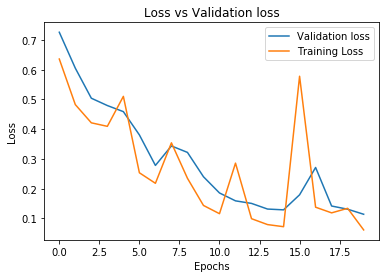

In [56]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])    
# plt.plot(cnnhistory['accuracy'],cnnhistory['val_acc'])
plt.legend({"Training Loss":0,"Validation loss":1})
plt.title('Loss vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('Loss.png')
plt.show()

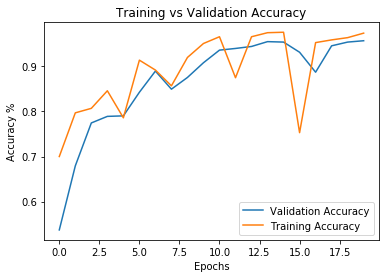

In [57]:
import matplotlib.pyplot as plt
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('Training vs Validation Accuracy')
plt.legend({"Training Accuracy":0,"Validation Accuracy":1})
plt.xlabel('Epochs')
plt.ylabel('Accuracy %')
plt.savefig("Accuracychart.png")
plt.show()

In [55]:
cnnmodel.save('halfdata.h5')

In [20]:
bigmodelhistory=cnnmodel.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=20,batch_size=48,shuffle=True)

Train on 79408 samples, validate on 79408 samples
Epoch 1/20
79408/79408 [==============================] - 1169s 15ms/step - loss: 0.2572 - acc: 0.8894 - val_loss: 0.1292 - val_acc: 0.9519
Epoch 2/20
79408/79408 [==============================] - 1081s 14ms/step - loss: 0.1026 - acc: 0.9642 - val_loss: 0.0769 - val_acc: 0.9736
Epoch 3/20
79408/79408 [==============================] - 1048s 13ms/step - loss: 0.0805 - acc: 0.9728 - val_loss: 0.0972 - val_acc: 0.9690
Epoch 4/20
79408/79408 [==============================] - 1042s 13ms/step - loss: 0.0784 - acc: 0.9736 - val_loss: 0.0347 - val_acc: 0.9878
Epoch 5/20
79408/79408 [==============================] - 1044s 13ms/step - loss: 0.0592 - acc: 0.9801 - val_loss: 0.0355 - val_acc: 0.9870
Epoch 6/20
79408/79408 [==============================] - 1034s 13ms/step - loss: 0.0539 - acc: 0.9816 - val_loss: 0.0398 - val_acc: 0.9870
Epoch 7/20
79408/79408 [==============================] - 1033s 13ms/step - loss: 0.0587 - acc: 0.9814 - val_l

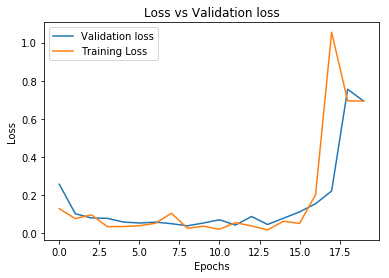

In [22]:
plt.plot(bigmodelhistory.history['loss'])
plt.plot(bigmodelhistory.history['val_loss'])    
# plt.plot(cnnhistory['accuracy'],cnnhistory['val_acc'])
plt.legend({"Training Loss":0,"Validation loss":1})
plt.title('Loss vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('FullLoss.png')
plt.show()

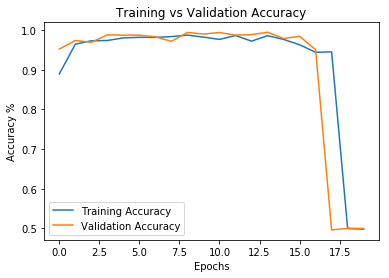

In [23]:
plt.plot(bigmodelhistory.history['accuracy'])
plt.plot(bigmodelhistory.history['val_accuracy'])
plt.title('Training vs Validation Accuracy')
plt.legend({"Training Accuracy":0,"Validation Accuracy":1})
plt.xlabel('Epochs')
plt.ylabel('Accuracy %')
plt.savefig("FullAccuracychart.png")
plt.show()